# Import Libraries and Tools

In [2]:
# !pip install fuzzy-c-means

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import fcmeans

# Load Dataset

In [13]:
path_dataset = './dataset_kuisioner_modelling.csv'

df = pd.read_csv(path_dataset)

In [14]:
df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,1.331249,-1.842272,1.167086,0.541336,0.697394,0.542665,0.717466,-1.900926,-2.316820,0.499195,-0.986895,-0.038262,0.077492,-0.680883,-0.152692,0.016408,-0.389100,0.013869,0.393008
1,1.410781,2.736121,0.889506,1.326657,4.554260,-1.571440,0.356489,-0.657066,1.642518,1.653131,-0.544280,0.460919,-1.034844,-1.460865,1.219234,0.208574,0.988203,-0.356360,0.548151
2,-3.088822,2.029637,0.646962,-0.253377,2.342580,0.894596,-1.372414,-2.744832,1.685273,-1.328698,0.563152,-0.662543,-0.202450,-0.645191,-0.785893,-0.151969,0.339357,0.535746,-0.964117
3,1.158651,-3.260424,-0.929211,-0.937510,-0.975913,-1.860845,-1.636574,-0.047876,1.809935,0.216796,-0.095312,-0.495269,-0.736997,0.197280,-0.743210,0.019861,-0.041683,0.298739,-0.401107
4,0.454424,0.252664,-1.201647,1.935980,0.893166,-1.326001,-0.410081,3.351603,-1.443921,-0.395450,0.874752,0.199066,-0.473595,-1.441605,-0.101373,-0.035655,0.639549,-0.020353,-0.015522


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC0     44 non-null     float64
 1   PC1     44 non-null     float64
 2   PC2     44 non-null     float64
 3   PC3     44 non-null     float64
 4   PC4     44 non-null     float64
 5   PC5     44 non-null     float64
 6   PC6     44 non-null     float64
 7   PC7     44 non-null     float64
 8   PC8     44 non-null     float64
 9   PC9     44 non-null     float64
 10  PC10    44 non-null     float64
 11  PC11    44 non-null     float64
 12  PC12    44 non-null     float64
 13  PC13    44 non-null     float64
 14  PC14    44 non-null     float64
 15  PC15    44 non-null     float64
 16  PC16    44 non-null     float64
 17  PC17    44 non-null     float64
 18  PC18    44 non-null     float64
dtypes: float64(19)
memory usage: 6.7 KB


In [16]:
df.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
count,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01
mean,8.023885e-16,-2.422305e-16,5.298792e-17,-1.778092e-16,-3.027881e-16,1.400395e-16,4.390427e-16,-5.147398e-16,-4.567054e-16,3.532528e-17,-7.140753e-16,-7.065056e-17,-1.261617e-17,-1.854577e-16,1.413011e-16,9.462128e-17,9.588290e-17,2.674628e-16,-2.144749e-17
std,2.743986e+00,2.364521e+00,1.718669e+00,1.635632e+00,1.597079e+00,1.470508e+00,1.278976e+00,1.195952e+00,1.138410e+00,1.053113e+00,8.733062e-01,8.407581e-01,8.205604e-01,7.745708e-01,7.542259e-01,7.187074e-01,6.748224e-01,6.584700e-01,6.321296e-01
min,-4.848941e+00,-4.360072e+00,-3.008863e+00,-3.302462e+00,-2.983044e+00,-2.504094e+00,-2.229791e+00,-2.744832e+00,-2.316820e+00,-2.038538e+00,-1.701458e+00,-1.963803e+00,-1.428534e+00,-1.460865e+00,-1.224041e+00,-1.111876e+00,-1.506273e+00,-1.239626e+00,-1.360439e+00
25%,-1.504793e+00,-1.848354e+00,-1.286683e+00,-9.581579e-01,-1.099891e+00,-1.122695e+00,-1.068581e+00,-6.615066e-01,-7.508870e-01,-6.367307e-01,-6.343250e-01,-5.407882e-01,-7.512129e-01,-6.063053e-01,-6.798353e-01,-5.632096e-01,-3.655364e-01,-5.562968e-01,-4.866822e-01
50%,1.879155e-01,8.092372e-02,1.571839e-03,-9.359521e-02,-2.723562e-01,5.173080e-02,1.400829e-01,-1.323636e-02,-1.311537e-02,-8.086974e-02,-7.988991e-02,-1.000733e-01,5.826358e-02,-1.839844e-02,-9.155823e-02,-5.538658e-02,1.471573e-02,4.617751e-02,5.251565e-02
75%,1.739872e+00,1.631420e+00,9.217114e-01,7.853354e-01,7.918606e-01,8.178143e-01,9.246319e-01,5.361265e-01,6.179816e-01,7.320485e-01,5.078030e-01,4.903325e-01,5.365486e-01,3.482048e-01,6.290509e-01,4.668973e-01,4.270699e-01,4.620130e-01,3.974478e-01
max,5.883597e+00,4.686464e+00,4.106721e+00,4.767519e+00,4.554260e+00,3.138914e+00,2.407325e+00,3.351603e+00,3.280011e+00,2.610476e+00,1.853094e+00,2.313092e+00,1.498705e+00,1.894154e+00,1.582082e+00,1.717685e+00,2.015465e+00,1.285909e+00,1.439629e+00


# Create Clustering Model

## K-Means Clustering

references: <br>
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ <br>

### Determine Total Cluster using Elbow Plot

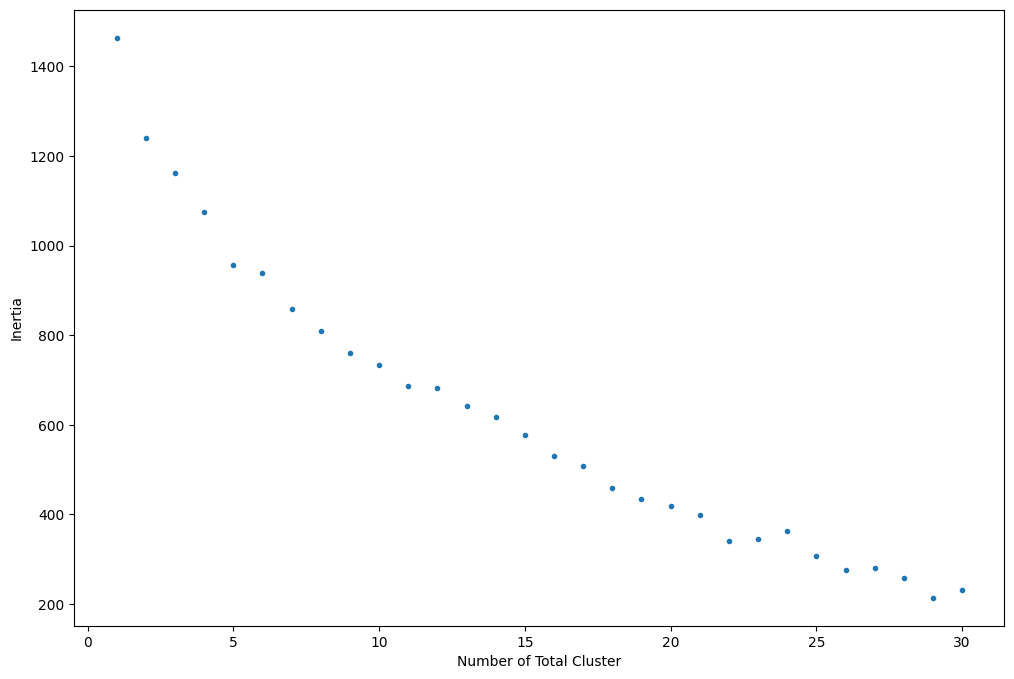

In [17]:
inertia_values = []
max_cluster = 30

for cluster in range(max_cluster):
#     print(cluster)
    kmeans = KMeans(n_clusters=cluster+1, n_init='auto')
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=[12, 8])

plt.plot(np.arange(1, max_cluster+1, step=1), inertia_values, marker='.', linestyle='')

plt.xlabel('Number of Total Cluster')
plt.ylabel('Inertia')

plt.show()

## Fuzzy C-Means Clustering